In [1]:
DATA_PATH = "c:/Users/amine/Downloads/reduced_technical_test/dataset_word_color"

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(DATA_PATH, transform=transform)
dataset_size = len(dataset)

# Define split sizes
train_size = int(0.9 * dataset_size)
val_size = int(0.05 * dataset_size)

# Split dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

print(f"Train: {len(train_dataset)}, Validation: {len(val_dataset)}, Test: {len(test_dataset)}")


Train: 94251, Validation: 5236, Test: 5237


In [9]:
# Load pretrained ResNet
#model = models.resnet18(pretrained=True)
model = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.IMAGENET1K_V1)

num_classes = len(dataset.classes)

# Replace the final layer
#model.fc = nn.Linear(model.fc.in_features, num_classes)
model.classifier[3] = nn.Linear(
    model.classifier[3].in_features,
    num_classes
)

# Move to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [10]:
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 15

for epoch in range(num_epochs):
    # ---- TRAINING ----
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Training")
    for imgs, labels in loop:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=running_loss/total, acc=100*correct/total)

    train_loss = running_loss / total
    train_acc = 100 * correct / total

    # ---- VALIDATION ----
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Validation"):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= val_total
    val_acc = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Train Acc={train_acc:.2f}%, "
          f"Val Loss={val_loss:.4f}, Val Acc={val_acc:.2f}%")


Epoch [1/15] - Validation: 100%|██████████| 21/21 [00:30<00:00,  1.43s/it]


Epoch 1: Train Loss=1.6249, Train Acc=46.14%, Val Loss=0.8367, Val Acc=69.60%


Epoch [2/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.15it/s]


Epoch 2: Train Loss=0.6471, Train Acc=76.00%, Val Loss=0.5362, Val Acc=80.35%


Epoch [3/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.13it/s]


Epoch 3: Train Loss=0.4602, Train Acc=83.07%, Val Loss=0.4329, Val Acc=84.01%


Epoch [4/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]


Epoch 4: Train Loss=0.3677, Train Acc=86.59%, Val Loss=0.3685, Val Acc=86.29%


Epoch [5/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.12it/s]


Epoch 5: Train Loss=0.3004, Train Acc=89.06%, Val Loss=0.3309, Val Acc=87.72%


Epoch [6/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.13it/s]


Epoch 6: Train Loss=0.2566, Train Acc=90.65%, Val Loss=0.3166, Val Acc=88.08%


Epoch [7/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.13it/s]


Epoch 7: Train Loss=0.2183, Train Acc=92.15%, Val Loss=0.2946, Val Acc=89.34%


Epoch [8/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]


Epoch 8: Train Loss=0.1884, Train Acc=93.23%, Val Loss=0.3021, Val Acc=89.19%


Epoch [9/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.12it/s]


Epoch 9: Train Loss=0.1631, Train Acc=94.22%, Val Loss=0.2987, Val Acc=89.78%


Epoch [10/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]


Epoch 10: Train Loss=0.1409, Train Acc=95.00%, Val Loss=0.2975, Val Acc=89.95%


Epoch [11/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.15it/s]


Epoch 11: Train Loss=0.1236, Train Acc=95.58%, Val Loss=0.2979, Val Acc=90.13%


Epoch [12/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.16it/s]


Epoch 12: Train Loss=0.1065, Train Acc=96.23%, Val Loss=0.2978, Val Acc=90.53%


Epoch [13/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]


Epoch 13: Train Loss=0.0922, Train Acc=96.84%, Val Loss=0.3120, Val Acc=90.28%


Epoch [14/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.16it/s]


Epoch 14: Train Loss=0.0804, Train Acc=97.19%, Val Loss=0.3189, Val Acc=90.76%


Epoch [15/15] - Validation: 100%|██████████| 21/21 [00:18<00:00,  1.13it/s]

Epoch 15: Train Loss=0.0671, Train Acc=97.74%, Val Loss=0.3417, Val Acc=90.22%


In [11]:
torch.save(model.state_dict(), "mobilenet_v3_small.pth")

In [12]:
import torch
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


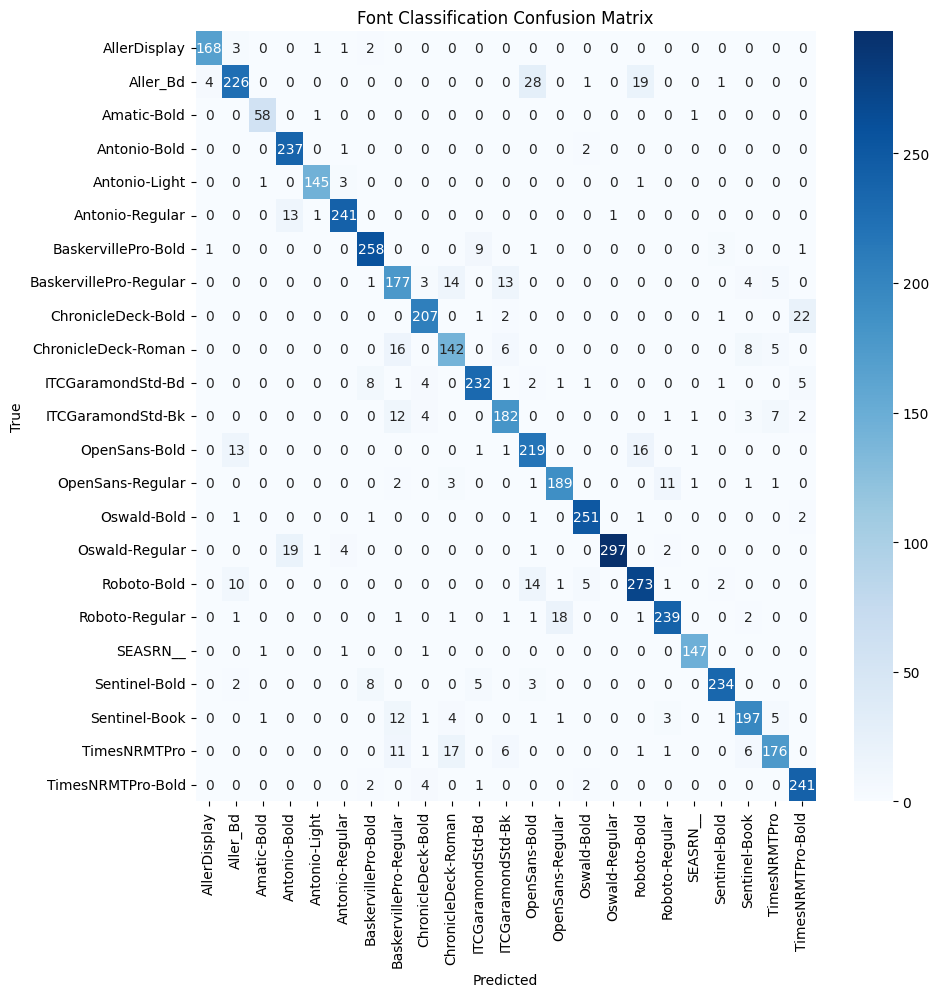

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds)
class_names = dataset.classes

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Font Classification Confusion Matrix")
plt.show()


In [15]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_preds, target_names=class_names)
print(report)


                        precision    recall  f1-score   support

          AllerDisplay       0.97      0.96      0.97       175
              Aller_Bd       0.88      0.81      0.84       279
           Amatic-Bold       0.95      0.97      0.96        60
          Antonio-Bold       0.88      0.99      0.93       240
         Antonio-Light       0.97      0.97      0.97       150
       Antonio-Regular       0.96      0.94      0.95       256
   BaskervillePro-Bold       0.92      0.95      0.93       273
BaskervillePro-Regular       0.76      0.82      0.79       217
    ChronicleDeck-Bold       0.92      0.89      0.90       233
   ChronicleDeck-Roman       0.78      0.80      0.79       177
     ITCGaramondStd-Bd       0.93      0.91      0.92       256
     ITCGaramondStd-Bk       0.86      0.86      0.86       212
         OpenSans-Bold       0.81      0.87      0.84       251
      OpenSans-Regular       0.90      0.90      0.90       209
           Oswald-Bold       0.96      